In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import numpy as np
import seaborn as sns

from scipy.stats import ttest_rel, ttest_ind

dir_gs = "."
dir_data = "."

sns.set_palette("colorblind")

 # Interaction model
  ## Figure 1 (d): Modeling cell communication as spatial cell state dependencies.

210422_INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1_SCHUERCH: loaded 1 runs with 3-fold cross validation
210422_INTERACTIONS_MAX_NODES_IMAGE_1_SCHUERCH: loaded 6 runs with 3-fold cross validation
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']


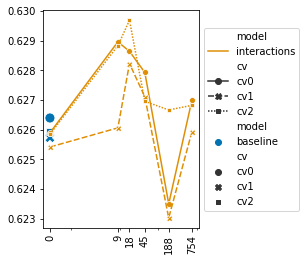

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210422_INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1_SCHUERCH",
        "210422_INTERACTIONS_MAX_NODES_IMAGE_1_SCHUERCH",
    ],
    lateral_resolution = 0.377442
)
gs_linear.load_gs()

gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1": "baseline",
            "INTERACTIONS_MAX_NODES_IMAGE_1": "interactions",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0,9,18,45,188,754],
)

## Paired t-test between baseline model and best spatial model

In [3]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")]
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1")]
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=6.047849331719845, pvalue=0.02626752133879902)


## Supp. Fig. 4 (e): Length scales of dependencies for different target cell-types.

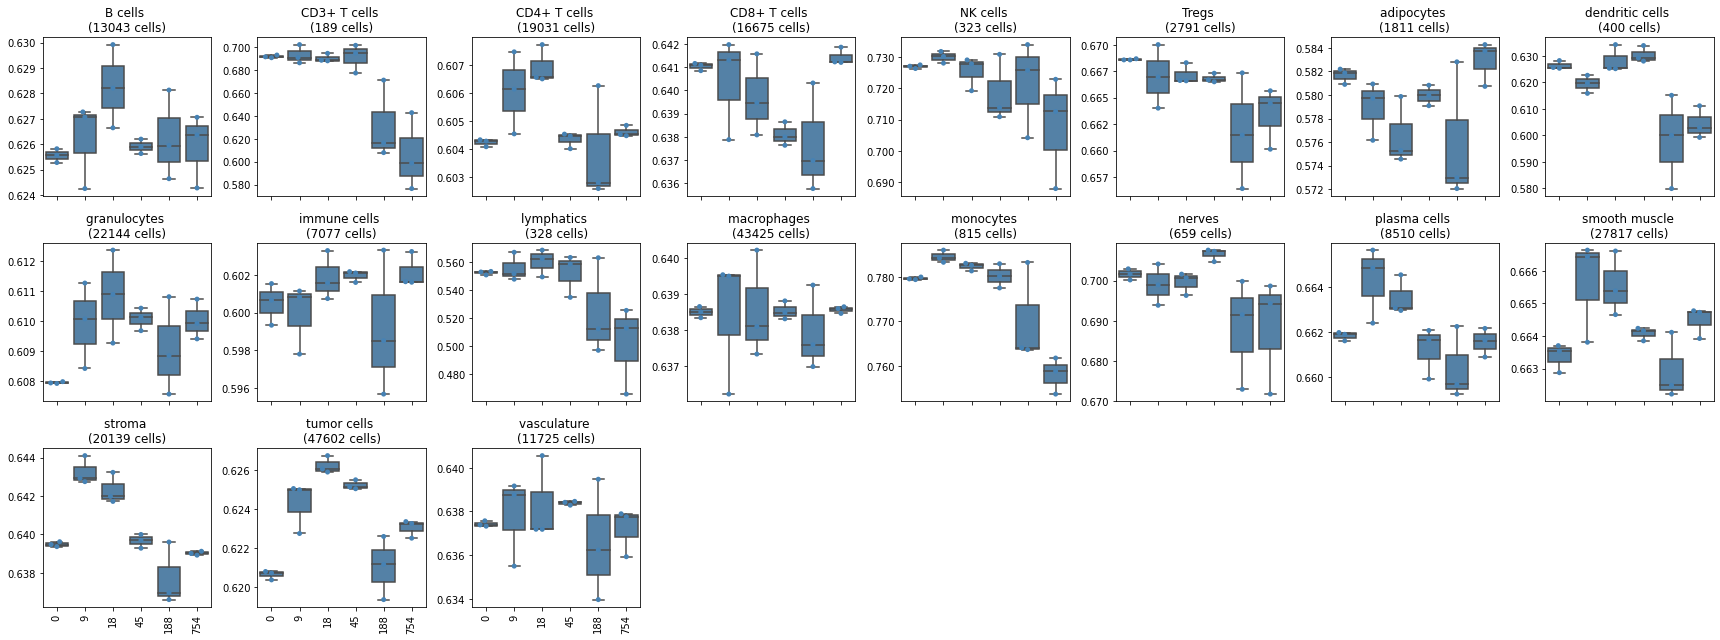

In [4]:
gs_linear.load_target_cell_evaluation()
gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'undefined']
gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'dirt']

gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

# Linear model
## Supp. Fig. 3: Linear models for spatial cell state dependencies.

210520_LINEAR_BASELINE_MAX_NODES_IMAGE_1_SCHUERCH: loaded 1 runs with 3-fold cross validation
210520_LINEAR_MAX_NODES_IMAGE_1_SCHUERCH: loaded 6 runs with 3-fold cross validation
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']


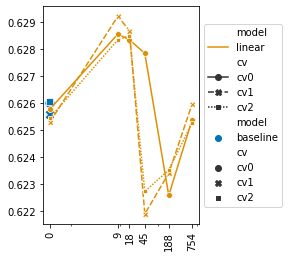

In [5]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210520_LINEAR_BASELINE_MAX_NODES_IMAGE_1_SCHUERCH",
        "210520_LINEAR_MAX_NODES_IMAGE_1_SCHUERCH",
    ],
    lateral_resolution = 0.377442
)
gs_linear.load_gs()

gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='linear',
    baseline_model_class='linear_baseline',
    rename_levels = [
        ("model", {
            "LINEAR_BASELINE_MAX_NODES_IMAGE_1": "baseline",
            "LINEAR_MAX_NODES_IMAGE_1": "linear",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0,9,18,45,188,754],
)